In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from timeit import Timer
from functools import partial
from memory_profiler import memory_usage
import timeit

In [70]:
def getPermutation(totalRange,numberElements):
    random_seed = 10312003
    rng = np.random.RandomState(random_seed)
    permutation = rng.permutation(totalRange)
    return permutation[:numberElements]

def mykmeans_plus_plus(X, max_clusters = 8, max_iterations=10000):
    randState = 10312003
    rnd = np.random.RandomState(randState)
    centroids=generateStartingCentroid(X,max_clusters)
    #distortion_plot = plt.figure()
    #d_ax = distortion_plot.add_subplot(111)

    #centroid_plot = plt.figure()
    #c_ax = centroid_plot.add_subplot(111)
    minInertia = 0
    inertia = 0
    for nIter in range(0, max_iterations):
        #for center in centroids:
        #    c_ax.plot(center[0], center[1],'r-')
       
        distances = pairwise_distances(X, centroids, metric='euclidean')
        clusters = np.argmin(distances,axis=1)
        min_distances = np.amin(distances, axis=1)
        sum_distortion = min_distances.sum()
        inertia = np.sum(np.amin(distances, axis=1))  
        if (minInertia ==0 or inertia < minInertia):
            minInertia = inertia
            notImproveCount=0
        elif minInertia !=0 and inertia >= minInertia:
            notImproveCount+=1
        if (notImproveCount>10):
            print "iteration: ", nIter
            print "notImproveCount: ",notImproveCount
            print "inertia: ",inertia, " minInertia:",minInertia   
            break
        #d_ax.plot(nIter, sum_distortion)
        data = np.concatenate([X, clusters[:,np.newaxis]], axis=1)
        for cRange in range(0,max_clusters):
            allpoints = data[np.where(data[:,(data.shape[1] - 1)] == cRange)][:,range(0, data.shape[1] -1)]
            centroids[cRange] = np.sum(allpoints, axis=0)/allpoints.shape[0]
        #print "Iteration {0}: Distortion {1}".format(nIter, sum_distortion)
        #d_ax.scatter(nIter, sum_distortion)

    #distortion_plot.savefig('plus_distortion_plot.png')
    #centroid_plot.savefig('plus_centroid_plot.png')
    return centroids

def generateStartingCentroid(X,maxClusternumbers):
    nPoint,dimension = X.shape
    centroids=np.zeros([maxClusternumbers,dimension])
    getPermutation
    randState = 10312003
    rnd = np.random.RandomState(randState)
    centroids[0] = X[rnd.permutation(len(X))[0]]
    for i in (range(1,maxClusternumbers)):
        distances = pairwise_distances(X, centroids[:i], metric='euclidean')
        d2weighting=np.power(np.min(distances,axis=1),2)
        d2weighting = d2weighting/np.sum(d2weighting)
        allIndex = range(len(X))
        index = np.random.choice(allIndex, p=d2weighting)
        centroids[i]=X[index]
    return centroids

In [71]:
def profile_memory_and_time(function, *args, **kwargs):
    #print "args is ",args
    start_time = timeit.default_timer()
    memory, return_val = memory_usage((function, (args), kwargs), max_usage=True, retval=True)
    elapsed = timeit.default_timer() - start_time
    return memory[0], elapsed,return_val

In [72]:
from sklearn.cluster import KMeans
kmeans_plus_plus=KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=100)

Running for 256 samples of dimension 32
iteration:  14
notImproveCount:  11
inertia:  1388.24120629  minInertia: 1388.24120629
iteration:  14
notImproveCount:  11
inertia:  1389.67191618  minInertia: 1389.67191618
Running for 1024 samples of dimension 32
iteration:  24
notImproveCount:  11
inertia:  5643.16200188  minInertia: 5643.16200188
iteration:  28
notImproveCount:  11
inertia:  5646.64265633  minInertia: 5646.64265633
Running for 4096 samples of dimension 32
iteration:  32
notImproveCount:  11
inertia:  22751.0919847  minInertia: 22751.0919847
iteration:  29
notImproveCount:  11
inertia:  22722.3009165  minInertia: 22722.3009165
Running for 16384 samples of dimension 32
iteration:  86
notImproveCount:  11
inertia:  91341.1279279  minInertia: 91341.1279279


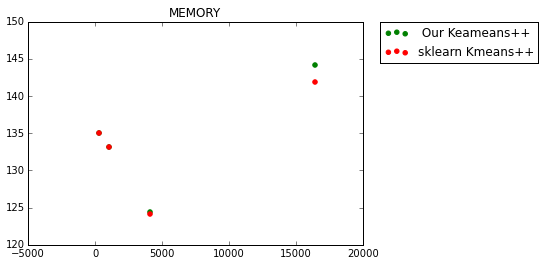

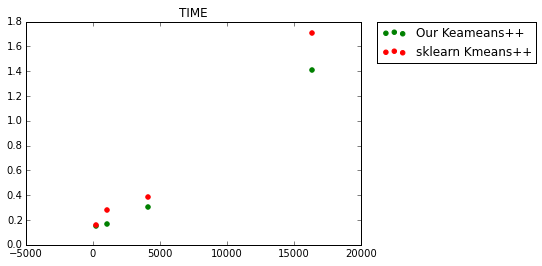

Script ended. Results:
numSamples:  [256, 1024, 4096, 16384]
ourMemories:  [134.9921875, 133.1328125, 124.41796875, 144.15625]
kmeansMemory:  [135.0234375, 133.12109375, 124.078125, 141.8671875]
ourTimes:  [0.15030813217163086, 0.16997814178466797, 0.3028721809387207, 1.412667989730835]
kmeansTimes:  [0.15613412857055664, 0.27712583541870117, 0.38739919662475586, 1.7058031558990479]


In [73]:
inputSizesToGenerate = [[2**8, 32],[2**10, 32],[2**12, 32],[2**14, 32]]
                        #[2**16, 32],[2**18, 32],[2**20, 32],[2**22, 32]];
                        #[2**24, 32],[2**26, 32],[2**28, 32],[2**30, 32],[2**32, 32]];

scaler = StandardScaler()
plt.ion()
f1 = plt.figure()
ax1 = f1.add_subplot(111)
ourTimes=[]
times=[]
ourMemories=[]
memoris=[]
numSamples=[]

for num_samples, num_dimension in inputSizesToGenerate:
    print "Running for {0} samples of dimension {1}".format(num_samples, num_dimension)
    X,y = make_blobs(n_samples=num_samples, n_features=num_dimension, centers=6)
    #print "Mean before scaling :\n%s"%X.mean(axis=0)
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    ourMemory,ourTime,ourCentroids= profile_memory_and_time(mykmeans_plus_plus, X, max_clusters = 10, max_iterations=1000)
    ourTimes.append(ourTime)
    ourMemories.append(ourMemory)
    memory, time, rval = profile_memory_and_time(kmeans_plus_plus.fit,X)
    times.append(time)
    memoris.append(memory)
    numSamples.append(num_samples)
plt.scatter(numSamples, ourMemories,color="green",label=" Our Keameans++")
plt.scatter(numSamples, memoris,color="red",label="sklearn Kmeans++")
plt.title("MEMORY")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.savefig('memory.png')
plt.clf()
plt.scatter(numSamples, ourTimes,color="green",label="Our Keameans++")
plt.scatter(numSamples, times,color="red",label="sklearn Kmeans++")
plt.title("TIME")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.savefig('time.png')
print "Script ended. Results:"
print "numSamples: ",numSamples
print "ourMemories: ",ourMemories
print "kmeansMemory: ",memoris
print "ourTimes: ", ourTimes
print "kmeansTimes: ",times
    

In [83]:
import numpy as np

def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [85]:
print cartesian(([2**2, 2**4, 2**6,2**8,2**10,2**12,2**14,2**18], [2**2, 2**4, 2**6,2**8,2**10,2**12], [16, 32,64]))

[[     4      4     16]
 [     4      4     32]
 [     4      4     64]
 [     4     16     16]
 [     4     16     32]
 [     4     16     64]
 [     4     64     16]
 [     4     64     32]
 [     4     64     64]
 [     4    256     16]
 [     4    256     32]
 [     4    256     64]
 [     4   1024     16]
 [     4   1024     32]
 [     4   1024     64]
 [     4   4096     16]
 [     4   4096     32]
 [     4   4096     64]
 [    16      4     16]
 [    16      4     32]
 [    16      4     64]
 [    16     16     16]
 [    16     16     32]
 [    16     16     64]
 [    16     64     16]
 [    16     64     32]
 [    16     64     64]
 [    16    256     16]
 [    16    256     32]
 [    16    256     64]
 [    16   1024     16]
 [    16   1024     32]
 [    16   1024     64]
 [    16   4096     16]
 [    16   4096     32]
 [    16   4096     64]
 [    64      4     16]
 [    64      4     32]
 [    64      4     64]
 [    64     16     16]
 [    64     16     32]
 [    64     16 